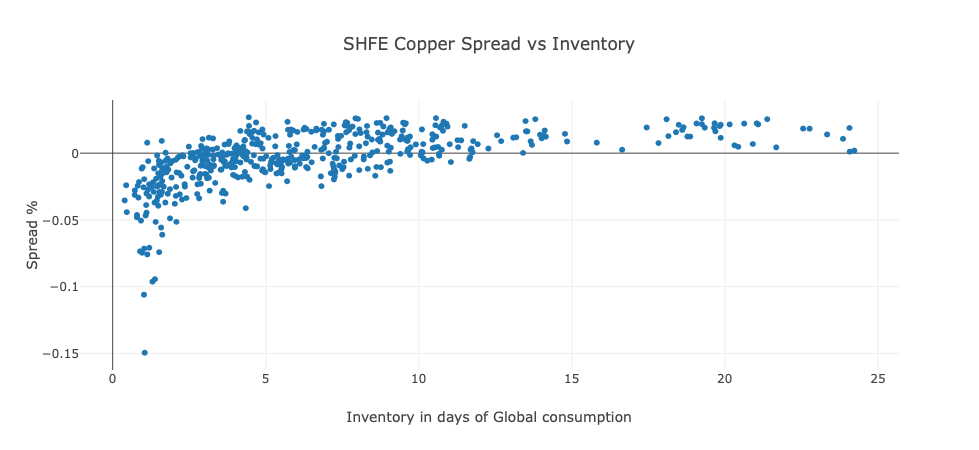

In [52]:
cons_data=[1869, 2226, 2663, 3020, 3171, 3621, 3571, 4746, 5149, 7086, 7385, 7881, 8896, 9830, 11303, 11353, 11642, 11790]
cons_date=pd.to_datetime(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', 
           '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
           '2015-12-31', '2016-12-31', '2017-12-31'])
cons = pd.DataFrame(data = cons_data, index=cons_date)

inv = pd.read_pickle('data/inventory.pkl').dropna()
inv['cons'] = cons
inv['cons'] = inv['cons'].ffill().bfill()

#['SHFE On Warrant']
sp = pd.read_pickle('data/SCFc-fc-spread')['SCFc07'].dropna()
sp_vs_inv = pd.concat([inv,sp], axis=1).dropna()
#sp_vs_inv['SHFE On Warrant'].plot(ax = sp_vs_inv.SCFc07.plot().twinx())
iplot(go.Figure(data=[go.Scatter(x=sp_vs_inv['SHFE On Warrant']/sp_vs_inv.cons, y=sp_vs_inv.SCFc07, mode='markers')],
     layout=go.Layout(title='SHFE Copper Spread vs Inventory', 
                      xaxis=dict(title='Inventory in days of Global consumption'),
                      yaxis=dict(title='Spread %'))))
